<a href="https://colab.research.google.com/github/yanliu1111/AlgoExpert-Easy/blob/main/machine-learning-projects/kmeans/kmeans_clustering.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering Project
Using KMeans Clustering to cluster Universities into to two groups: Private and Public.
## The Data
Data frame has 777 observations on the following 18 variables.

- Private A factor with levels No and Yes indicating private or public university
- Apps Number of applications received
- Accept Number of applications accepted
- Enroll Number of new students enrolled
- Top10perc Pct. new students from top 10% of H.S. class
- Top25perc Pct. new students from top 25% of H.S. class
- F.Undergrad Number of fulltime undergraduates
- P.Undergrad Number of parttime undergraduates
- Outstate Out-of-state tuition
- Room.Board Room and board costs
- Books Estimated book costs
- Personal Estimated personal spending
- PhD Pct. of faculty with Ph.D.’s
- Terminal Pct. of faculty with terminal degree
- S.F.Ratio Student/faculty ratio
- perc.alumni Pct. alumni who donate
- Expend Instructional expenditure per student
- Grad.Rate Graduation rate


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('College_Data',index_col=0)

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

## EDA
**Creating a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.**

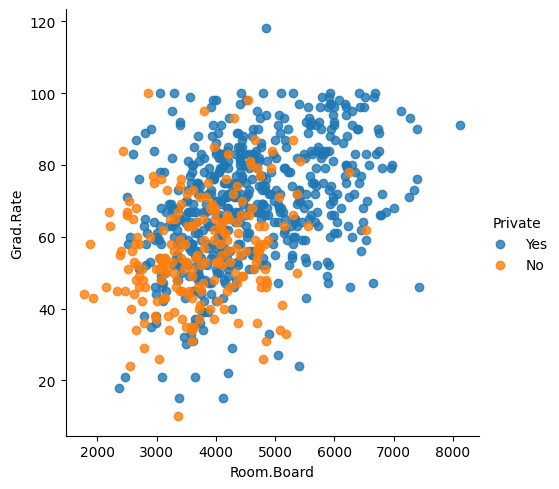

In [5]:
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private',fit_reg=False)

**Creating a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**



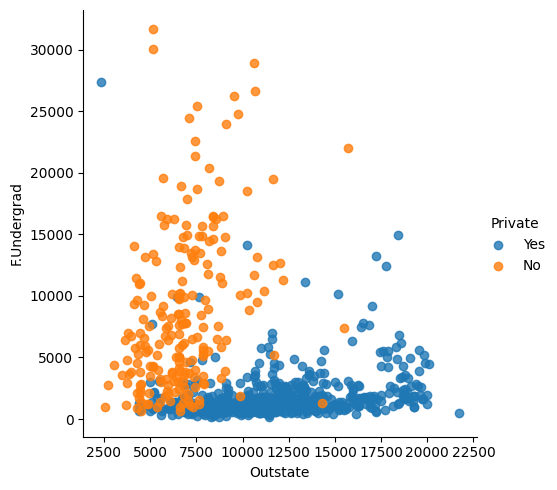

In [6]:
sns.lmplot(x='Outstate', y='F.Undergrad', data=df, hue='Private',fit_reg=False)

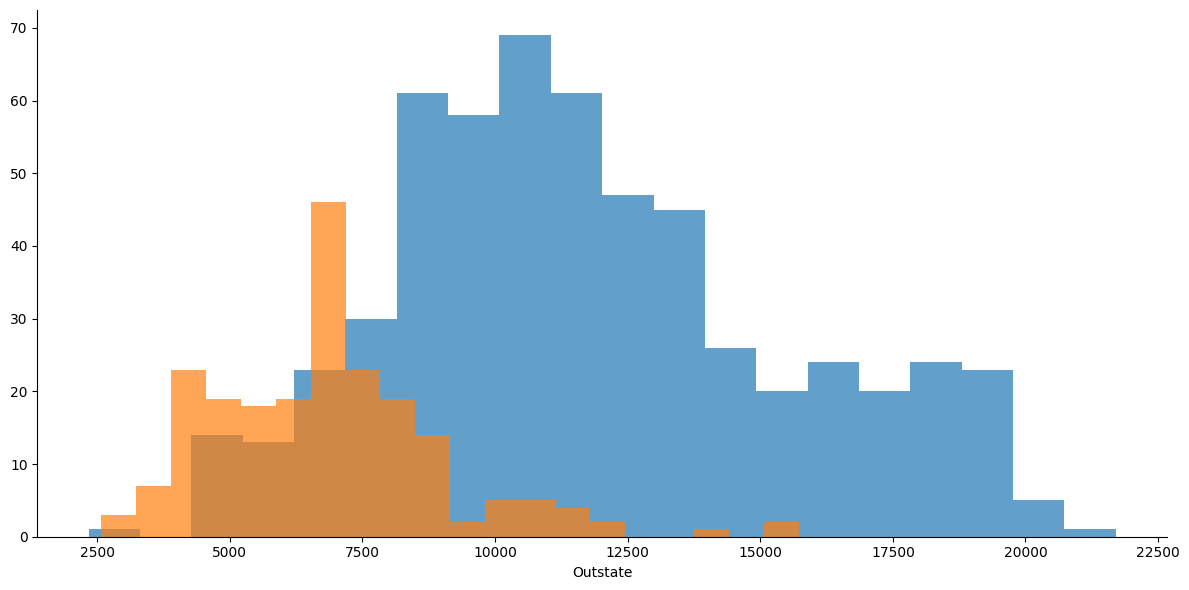

In [15]:
g = sns.FacetGrid(df, hue='Private', height=6, aspect=2)
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)


**Creating a similar histogram for the Grad.Rate column.**

In [9]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [10]:
df['Grad.Rate']['Cazenovia College'] = 100

<ipython-input-10-bc95ac68ab2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grad.Rate']['Cazenovia College'] = 100


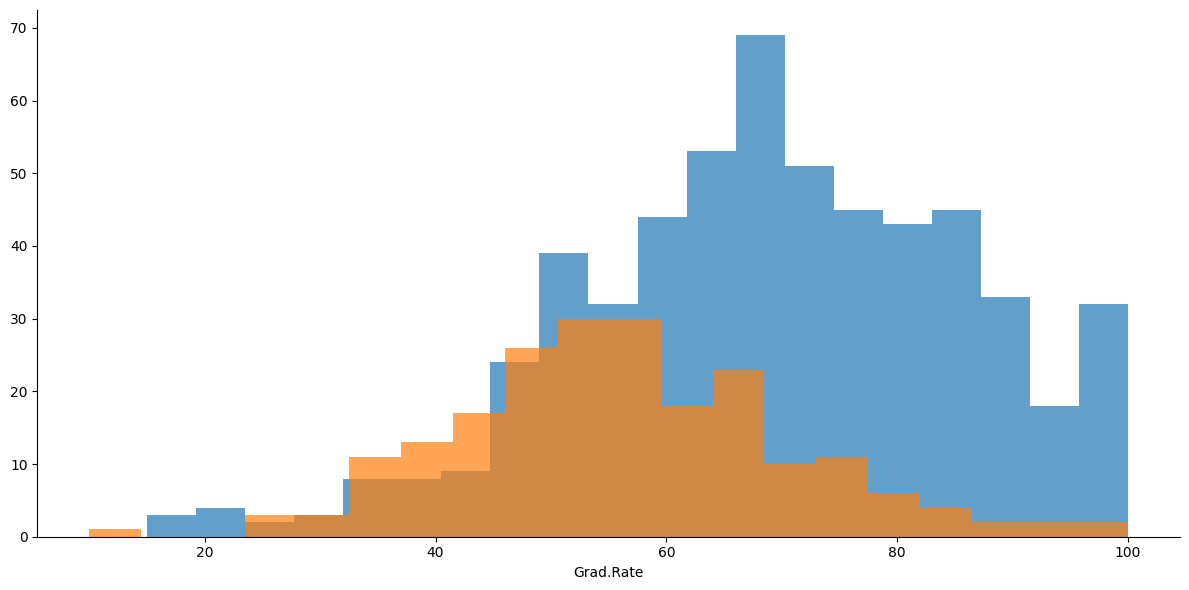

In [13]:
g = sns.FacetGrid(df, hue='Private', size=6, aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

## K Means Cluster Creation

In [16]:
from sklearn.cluster import KMeans

**Creating an instance of a K Means model with 2 clusters**

In [17]:
kmeans = KMeans(n_clusters=2)

**Fitting the model to all the data except for the Private label.**

In [18]:
kmeans.fit(df.drop('Private',axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [19]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

## Evaluation
**Creating a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [20]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [21]:
df['Cluster']=df['Private'].apply(converter)

In [22]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


**Creating a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

